In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [110]:
main_df = pd.read_csv('house_sales.csv')
main_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [111]:
main_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [112]:
main_df['date'] = main_df['date'].str[:8]
main_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [113]:
main_df = main_df[main_df['bedrooms'] > 0]  
main_df = main_df[main_df['bathrooms'] > 0]
main_df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living      977
sqft_lot         915
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [114]:
main_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [115]:
main_df.loc[main_df['sqft_living'].isnull() & main_df['sqft_above'].notnull() & main_df['sqft_basement'].notnull(),
'sqft_living'] = main_df['sqft_above'] + main_df['sqft_basement']

main_df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot         915
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [116]:
main_df = main_df[main_df['sqft_lot'] > 0]
main_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [117]:
main_df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [118]:
waterfront_df = main_df[main_df['waterfront'] == 1]
waterfront_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,20150311,1350000.0,3.0,2.50,2753.0,65005.0,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
246,2025069065,20140929,2400000.0,4.0,2.50,3650.0,8354.0,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
300,3225069065,20140624,3075000.0,4.0,5.00,4550.0,18641.0,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
540,622049114,20150218,2125000.0,3.0,2.50,5403.0,24069.0,2.0,1,4,...,12,5403,0,1976,0,98166,47.4169,-122.348,3980,104374
656,3760500116,20141120,3070000.0,3.0,2.50,3930.0,55867.0,1.0,1,4,...,8,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,2623039019,20140508,988500.0,3.0,2.75,2015.0,16807.0,2.0,1,4,...,9,2015,0,2007,0,98166,47.4500,-122.377,1780,12310
19984,2025069140,20150317,1898000.0,3.0,2.50,2830.0,4334.0,3.0,1,4,...,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20325,518500480,20140811,3000000.0,3.0,3.50,4410.0,10756.0,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20767,8043700105,20150417,2300000.0,4.0,4.00,4360.0,8175.0,2.5,1,4,...,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525


In [119]:
no_waterfront_df = main_df[main_df['waterfront'] == 0]
no_waterfront_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [120]:
view_df = main_df[main_df['view'] == 1]
view_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
282,7424700045,20150513,2050000.0,5.0,3.00,3830.0,8480.0,2.0,0,1,...,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
394,1923000030,20140728,1118000.0,4.0,2.50,3840.0,16619.0,2.0,0,1,...,10,3840,0,1983,0,98040,47.5634,-122.213,3600,16553
489,5423010350,20150210,1280000.0,5.0,2.50,3400.0,9500.0,2.0,0,1,...,8,3400,0,1977,0,98027,47.5645,-122.082,3080,11081
491,2475200140,20150205,370000.0,3.0,2.00,1680.0,5036.0,1.0,0,1,...,7,1680,0,1987,0,98055,47.4734,-122.186,1680,4921
556,5486800070,20140620,1950000.0,7.0,3.50,4640.0,15235.0,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,6447300365,20141113,2900000.0,5.0,4.00,5190.0,14600.0,2.0,0,1,...,11,5190,0,2013,0,98039,47.6102,-122.225,3840,19250
21082,8562900430,20140718,800000.0,4.0,2.50,3691.0,11088.0,2.0,0,1,...,8,3691,0,2013,0,98074,47.6122,-122.059,3190,11270
21310,2154970020,20140703,2351960.0,4.0,4.25,5010.0,19412.0,2.0,0,1,...,11,4000,1010,2014,0,98040,47.5455,-122.211,3820,17064
21395,3879900754,20140915,779000.0,3.0,2.50,1580.0,1487.0,3.0,0,1,...,9,1580,0,2009,0,98119,47.6276,-122.359,1610,1297


In [121]:
non_view_df = main_df[main_df['view'] == 0]
non_view_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


After either removing null values from our dataset, the total number of records went from 21,613 to 19,459 total records. I decided to also put records that were next to waterfronts in its own dataframe, as well as houses that were listed to have "views". There are only 143 records that were true for waterfronts, and 292 records that were true for having 'views'. 

In [122]:
waterfront_price_df = waterfront_df['price']
waterfront_desc = round(waterfront_price_df.describe(), 2)
waterfront_desc

count        141.00
mean     1718797.11
std      1144038.20
min       285000.00
25%       825000.00
50%      1517000.00
75%      2300000.00
max      7062500.00
Name: price, dtype: float64

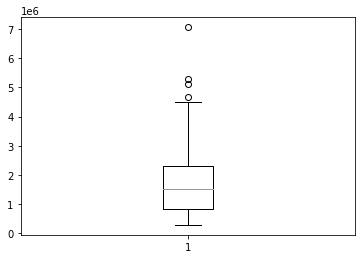

In [123]:
plt.boxplot(waterfront_price_df)
plt.show()

In [124]:
waterfront_price_df = waterfront_price_df < 4225000
waterfront_price_df

49       True
246      True
300      True
540      True
656      True
         ... 
19971    True
19984    True
20325    True
20767    True
21576    True
Name: price, Length: 141, dtype: bool